<h1><center><b><u>Inner Join, Union & Subquery </h1></center></b></u>


<h2><u>Group By:</h2></u>

The SQL GROUP BY clause is used in collaboration with the SELECT statement to arrange identical data into groups. This GROUP BY clause follows the WHERE clause in a SELECT statement and precedes the ORDER BY clause.

<u>Syntax:</u>

SELECT column1, column2
FROM table_name
WHERE [ conditions ]
GROUP BY column1, column2
ORDER BY column1, column2

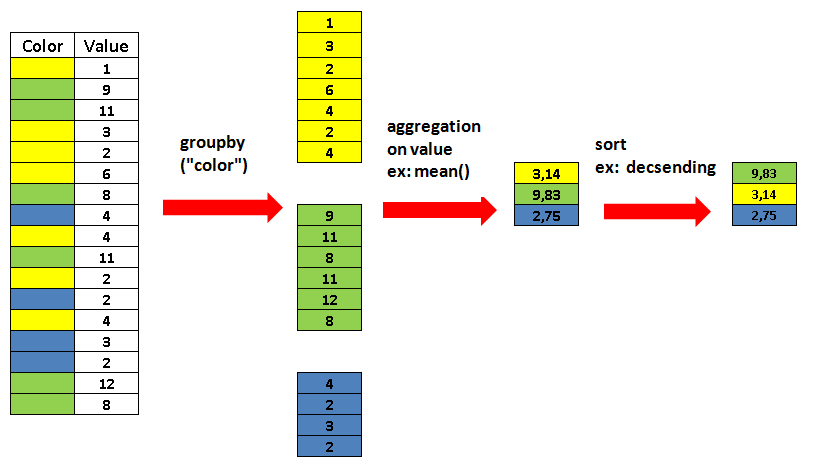

Refer: https://www.geeksforgeeks.org/sql-group-by/

<h2><u>Inner Join:</h2></u>

The INNER JOIN keyword selects records that have matching values in both tables.

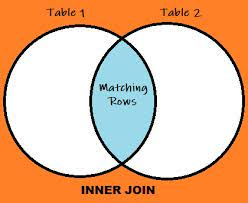 

Refer:https://www.tutorialspoint.com/sql/sql-inner-joins.htm

<h2><u>Union:</h2></u>

 The UNION operator is used to combine the result-set of two or more SELECT statements. 

 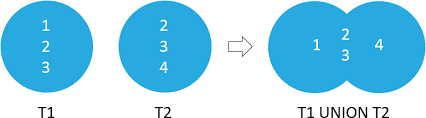

 Refer https://www.tutorialspoint.com/sql/sql-unions-clause.htm

### Now lets begin with the implementation of queries.

**In this assignment we will be using the Hospital Management System Schema having 5 tables. Given Below is the ER diagram of the same.**


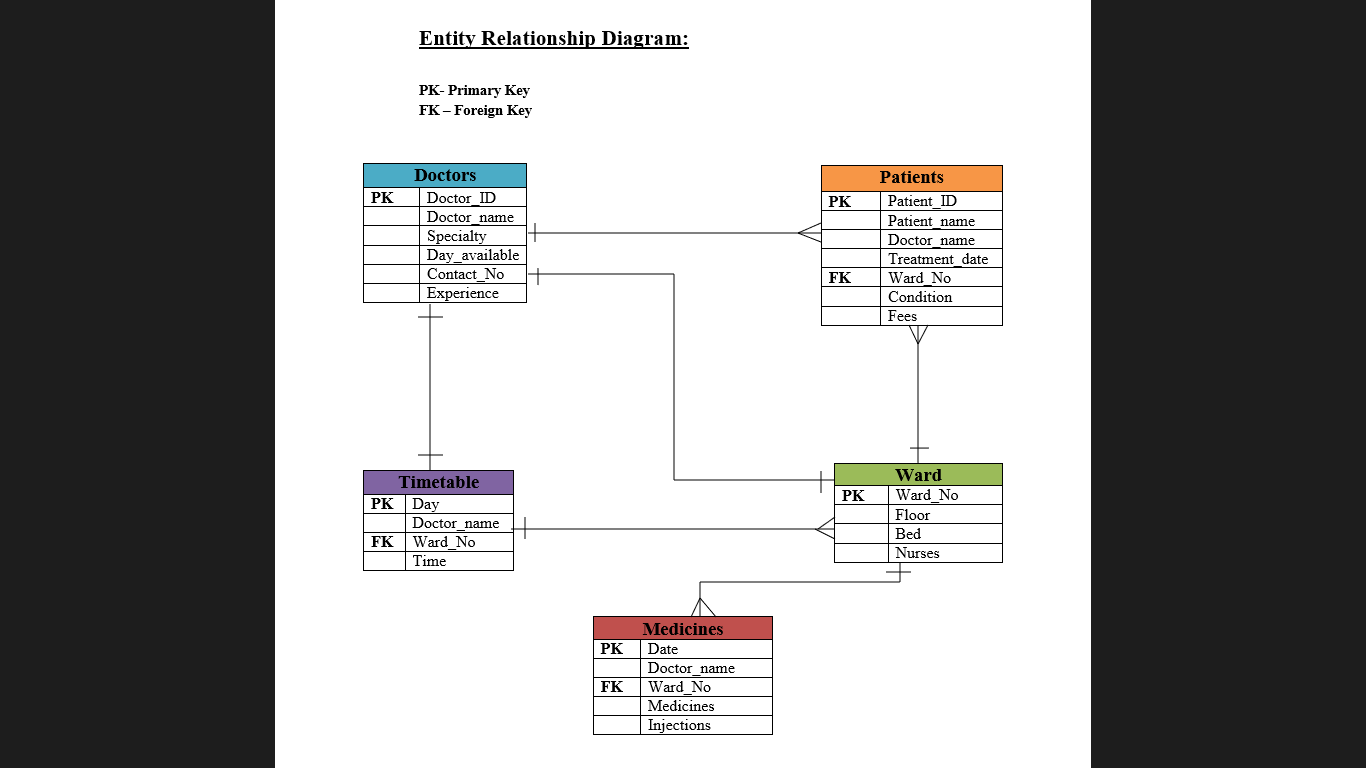

### **DATABASE CREATION AND CONNECTING IT**

#### **Just run next 5 cells**

In [2]:
!pip install SQLAlchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9


In [3]:
import pandas as pd 

In [4]:
import sqlite3

In [5]:
sql=sqlite3.connect('groupby.db')

In [6]:
%load_ext sql

In [7]:
%sql sqlite:///groupby.db

###**NOW WE WILL CREATE TABLES AND INSERT DATA**
##### **RUN NEXT 17 CELLS TO CREATE TABLE AND INSERT DATA**


In [8]:
%%sql
CREATE TABLE Doctors(Doctor_ID int(16),Doctor_name varchar(30),Specialty varchar(20),Day_Available varchar(20),Contact_No int(11),Experience int(10))

 * sqlite:///groupby.db
Done.


[]

In [9]:
%%sql 
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(1,'Dr.Harsh','Dietician','Monday',9876543210,5);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(2,'Dr.Simran','Cardiologist','Tuesday',995671866,6);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(3,'Dr.Abhishek','Gynecologist','Monday',8756128765,4);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(4,'Dr.Tanuja','Dietician','Tuesday',9875617286,2);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(1,'Dr.Vedant','Cardiologist','Monday',678195278,10);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(5,'Dr.Sanika','Gynecologist','Monday',9876524516,2);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(6,'Dr.Nitish','Neurologist','Saturday',7651862542,4);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(7,'Dr.Sanskriti','Dietician','Tuesday',9876545678,5);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(8,'Dr.Pranali','Gynecologist','Monday',7689018765,6);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(9,'Dr.Paavana','Dietician','Sunday',6789156278,10);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(10,'Dr.Devang','Cardiologist','Monday',18976254187,10);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(11,'Dr.Rutuja','Dietician','Wednesday',18726578976,5);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(12,'Dr.Gayatri','Neurologist','Sunday',98735678176,6);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(13,'Dr.Amar','Dietician','Thursday',7890876543,5);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(14,'Dr.Aditya','Cardiologist','Friday',6789098765,4);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(15,'Dr.Salil','Dietician','Tuesday',9872456789,2);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(16,'Dr.Prajwal','Gynecologist','Saturday',9865435671,6);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(17,'Dr.Sami','Cardiologist','Friday',9876543245,5);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(18,'Dr.Sakshi','Neurologist','Wednesday',9876547892,5);
INSERT INTO Doctors('Doctor_ID','Doctor_name','Specialty','Day_Available','Contact_No','Experience') VALUES(19,'Dr.Aadinath','Gynecologist','Thursday',9875672897,10);


 * sqlite:///groupby.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [10]:
%%sql
SELECT * FROM Doctors;

 * sqlite:///groupby.db
Done.


Doctor_ID,Doctor_name,Specialty,Day_Available,Contact_No,Experience
1,Dr.Harsh,Dietician,Monday,9876543210,5
2,Dr.Simran,Cardiologist,Tuesday,995671866,6
3,Dr.Abhishek,Gynecologist,Monday,8756128765,4
4,Dr.Tanuja,Dietician,Tuesday,9875617286,2
1,Dr.Vedant,Cardiologist,Monday,678195278,10
5,Dr.Sanika,Gynecologist,Monday,9876524516,2
6,Dr.Nitish,Neurologist,Saturday,7651862542,4
7,Dr.Sanskriti,Dietician,Tuesday,9876545678,5
8,Dr.Pranali,Gynecologist,Monday,7689018765,6
9,Dr.Paavana,Dietician,Sunday,6789156278,10


In [11]:
%%sql
CREATE TABLE Patients(Patient_ID int(10),Patient_name varchar(20),Doctor_name varchar(30),Treatment_date varchar(10),Ward_no int(3),Condition varchar(10),Fees int(10))


 * sqlite:///groupby.db
Done.


[]

In [12]:
%%sql
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(1,'shruti','Dr.Simran','01-02-22',1,'Good',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(2,'rahul','Dr.Simran','01-02-22',1,'Good',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(3,'rohit','Dr.Abhishek','01-02-22',2,'Intermediate',400);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(4,'raj','Dr.Tanuja','01-02-22',3,'Good',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(5,'roshan','Dr.Simran','01-02-22',1,'Intermediate',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(6,'nupur','Dr.Harsh','02-02-22',1,'Bad',100);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(7,'sahil','Dr.Abhishek','02-02-22',2,'Better',600);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(8,'shreya','Dr.Vedant','02-02-22',5,'Good',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(9,'tanvi','Dr.Tanuja','03-02-22',3,'Bad',500);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(10,'dipti','Dr.Simran','03-02-22',1,'Intermediate',400);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(11,'snehal','Dr.Abhishek','03-02-22',2,'Better',100);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(12,'abhijit','Dr.Simran','04-02-22',1,'Good',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(13,'anam','Dr.Vedant','04-02-22',5,'Bad',500);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(14,'sanyukta','Dr.Simran','04-02-22',1,'Intermediate',500);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(15,'smruti','Dr.Simran','01-03-22',1,'Good',600);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(16,'siddhesh','Dr.Abhishek','01-03-22',2,'Good',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(17,'krutik', 'Dr.Vedant','01-03-22',5,'Bad',500);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(18,'jay','Dr.Tanuja','02-03-22',3,'Good',500);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(19,'jayant','Dr.Simran','02-03-22',1,'Intermediate',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(20,'vineet','Dr.Vedant','01-04-22',5,'Better',400);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(21,'riddhi','Dr.Abhishek','01-04-22',2,'Bad',200);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(22,'vishaka','Dr.Harsh','02-05-22',4,'Good',100);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(23,'sarthak','Dr.Simran','02-05-22',1,'Good',400);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(24,'yash','Dr.Vedant','02-04-22',5,'Better',500);
INSERT INTO Patients('Patient_ID','Patient_name','Doctor_name','Treatment_date','Ward_no','Condition','Fees') VALUES(25,'suraj','Dr.Sanika','04-05-22',6,'Good',200);



 * sqlite:///groupby.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [13]:
%%sql
SELECT * FROM Patients

 * sqlite:///groupby.db
Done.


Patient_ID,Patient_name,Doctor_name,Treatment_date,Ward_no,Condition,Fees
1,shruti,Dr.Simran,01-02-22,1,Good,200
2,rahul,Dr.Simran,01-02-22,1,Good,200
3,rohit,Dr.Abhishek,01-02-22,2,Intermediate,400
4,raj,Dr.Tanuja,01-02-22,3,Good,200
5,roshan,Dr.Simran,01-02-22,1,Intermediate,200
6,nupur,Dr.Harsh,02-02-22,1,Bad,100
7,sahil,Dr.Abhishek,02-02-22,2,Better,600
8,shreya,Dr.Vedant,02-02-22,5,Good,200
9,tanvi,Dr.Tanuja,03-02-22,3,Bad,500
10,dipti,Dr.Simran,03-02-22,1,Intermediate,400


In [14]:
%%sql
CREATE TABLE Timetable(Day varchar(20),Doctor_name varchar(20),Ward_no int(3),Time varchar(20))


 * sqlite:///groupby.db
Done.


[]

In [15]:
%%sql
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Monday','Dr.Harsh',4,'10am');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Tuesday','Dr.Simran',1,'10am');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Wednesday','Dr.Rutuja',7,'11am');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Thursday','Dr.Amar',8,'1pm');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Friday','Dr.Aditya',9,'3pm');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Saturday','Dr.Prajwal',10,'11am');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Sunday','Dr.Paavana',11,'4pm');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Monday','Dr.Sanika',6,'10am');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Tuesday','Dr.Tanuja',3,'4am');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Wednesday','Dr.Sakshi',12,'10pm');
INSERT INTO Timetable('Day','Doctor_name','Ward_no','Time') VALUES('Thursday','Dr.Aadinath',13,'8am');


 * sqlite:///groupby.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [16]:
%%sql
SELECT * FROM Timetable

 * sqlite:///groupby.db
Done.


Day,Doctor_name,Ward_no,Time
Monday,Dr.Harsh,4,10am
Tuesday,Dr.Simran,1,10am
Wednesday,Dr.Rutuja,7,11am
Thursday,Dr.Amar,8,1pm
Friday,Dr.Aditya,9,3pm
Saturday,Dr.Prajwal,10,11am
Sunday,Dr.Paavana,11,4pm
Monday,Dr.Sanika,6,10am
Tuesday,Dr.Tanuja,3,4am
Wednesday,Dr.Sakshi,12,10pm


In [17]:
%%sql
CREATE TABLE Ward(Ward_no int(3),Floor int(2),Beds int(20),Nurses int(10))


 * sqlite:///groupby.db
Done.


[]

In [18]:
%%sql
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(1,1,10,3);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(2,1,12,4);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(3,1,13,3);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(4,1,10,3);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(5,2,9,2);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(6,2,8,3);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(7,2,10,4);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(8,2,9,3);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(9,3,13,2);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(10,3,10,3);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(11,3,13,2);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(12,4,10,3);
INSERT INTO Ward('Ward_no','Floor','Beds','Nurses') VALUES(13,4,9,4);


 * sqlite:///groupby.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [19]:
%%sql
SELECT * FROM Ward

 * sqlite:///groupby.db
Done.


Ward_no,Floor,Beds,Nurses
1,1,10,3
2,1,12,4
3,1,13,3
4,1,10,3
5,2,9,2
6,2,8,3
7,2,10,4
8,2,9,3
9,3,13,2
10,3,10,3


In [20]:
%%sql
CREATE TABLE Medicines(Date varchar(10),Doctor_name varchar(10),Ward_no int(3),Injections int(5),Medicines int(5))


 * sqlite:///groupby.db
Done.


[]

In [21]:
%%sql
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('01-02-22','Dr.Simran',1,20,40);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('01-02-22','Dr.Harsh',4,30,50);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('01-02-22','Dr.Vedant',5,10,30);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('02-02-22','Dr.Abhishek',2,20,40);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('02-02-22','Dr.Tanuja',3,40,60);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('02-02-22','Dr.Sanika',6,10,35);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('02-02-22','Dr.Rutuja',7,34,67);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('03-02-22','Dr.Simran',1,20,40);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('03-02-22','Dr.Harsh',4,15,43);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('03-02-22','Dr.Simran',1,20,40);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('01-03-22','Dr.Vedant',5,12,24);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('01-03-22','Dr.Simran',1,23,34);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('01-03-22','Dr.Abhishek',2,33,45);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('02-03-22','Dr.Harsh',4,22,43);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('02-03-22','Dr.Simran',1,20,40);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('01-04-22','Dr.Vedant',5,20,40);
INSERT INTO Medicines('Date','Doctor_name','Ward_no','Injections','Medicines') VALUES('01-04-22','Dr.Tanuja',3,22,45);

 * sqlite:///groupby.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [22]:
%%sql
SELECT * FROM Medicines

 * sqlite:///groupby.db
Done.


Date,Doctor_name,Ward_no,Injections,Medicines
01-02-22,Dr.Simran,1,20,40
01-02-22,Dr.Harsh,4,30,50
01-02-22,Dr.Vedant,5,10,30
02-02-22,Dr.Abhishek,2,20,40
02-02-22,Dr.Tanuja,3,40,60
02-02-22,Dr.Sanika,6,10,35
02-02-22,Dr.Rutuja,7,34,67
03-02-22,Dr.Simran,1,20,40
03-02-22,Dr.Harsh,4,15,43
03-02-22,Dr.Simran,1,20,40


### NOW YOU CAN BEGIN WITH THE QUERIES.

### 1. Display patient names recommending Dr.Simran.

Refer: https://www.tutorialspoint.com/sql/sql-where-clause.htm

In [23]:
%%sql
select Patient_name from Patients where Doctor_name='Dr.Simran'


 * sqlite:///groupby.db
Done.


Patient_name
shruti
rahul
roshan
dipti
abhijit
sanyukta
smruti
jayant
sarthak


### 2.	Display number of patients treated by the same doctor and in the same ward.

Refer: https://www.geeksforgeeks.org/sql-group-by/

In [24]:
%%sql
select count(Patient_name) as 'Number of patients', Doctor_name, Ward_no from Patients
group by Doctor_name,Ward_no

 * sqlite:///groupby.db
Done.


Number of patients,Doctor_name,Ward_no
5,Dr.Abhishek,2
1,Dr.Harsh,1
1,Dr.Harsh,4
1,Dr.Sanika,6
9,Dr.Simran,1
3,Dr.Tanuja,3
5,Dr.Vedant,5


### 3.	Display the average fees taken by each Doctor.

Refer: https://www.geeksforgeeks.org/sql-group-by/

In [25]:
%%sql
select Doctor_name, avg(Fees) as 'Average Fees' from Patients
group by Doctor_name

 * sqlite:///groupby.db
Done.


Doctor_name,Average Fees
Dr.Abhishek,300.0
Dr.Harsh,100.0
Dr.Sanika,200.0
Dr.Simran,322.22222222222223
Dr.Tanuja,400.0
Dr.Vedant,420.0


### 4.	Which specialist has used the maximum number of injections on date ‘01-02-22’?

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/



In [26]:
%%sql
select Specialty, max(Injections) as 'Maximum Injections' 
from Doctors as d join Medicines as m 
on d.Doctor_name = m.Doctor_name
where m.Date = '01-02-22'
group by Specialty


/* %%sql
select Specialty, max(Injections) as 'Maximum Injections' 
from Doctors as d , Medicines as m 
where m.Date = '01-02-22' and d.Doctor_name = m.Doctor_name
group by Specialty */ 

 * sqlite:///groupby.db
Done.


Specialty,Maximum Injections
Cardiologist,20
Dietician,30


### 5.	How many nurses were present on Wednesday with Dr.Rutuja?

Refer: https://www.geeksforgeeks.org/nested-queries-in-sql/

In [27]:
%%sql
select w.Nurses, t.Doctor_name 
from Timetable as t, Ward as w 
where w.Ward_no = t.Ward_no and 
      t.Day='Wednesday' and 
      t.Doctor_name = 'Dr.Rutuja'

 * sqlite:///groupby.db
Done.


Nurses,Doctor_name
4,Dr.Rutuja


### 6.	At what time is Dr.Rutuja available on Wednesday?

Refer: https://www.tutorialspoint.com/sql/sql-where-clause.htm

In [28]:
%%sql
select t.Doctor_name , Time from Timetable as t
where  t.Day='Wednesday' and
       t.Doctor_name = 'Dr.Rutuja'

 * sqlite:///groupby.db
Done.


Doctor_name,Time
Dr.Rutuja,11am


### 7.	Count of patients with good condition treated by each doctor?

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/

In [29]:
%%sql 
select p.Doctor_name, count(p.Condition) as 'Number of patients in good condition'
from Patients as p
where p.Condition='Good'
group by p.Doctor_name

 * sqlite:///groupby.db
Done.


Doctor_name,Number of patients in good condition
Dr.Abhishek,1
Dr.Harsh,1
Dr.Sanika,1
Dr.Simran,5
Dr.Tanuja,2
Dr.Vedant,1


### 8.	Wards on which floor has used the minimum number of medicines on date ‘02-02-22’?

Refer: https://www.geeksforgeeks.org/nested-queries-in-sql/

In [30]:
%%sql 
select Floor, min(m.Medicines) as 'Medicines' from Medicines as m, Ward as w
where m.Ward_no=w.Ward_no and m.Date='02-02-22'

 * sqlite:///groupby.db
Done.


Floor,Medicines
2,35


### 9.	Display ward no. having minimum number of beds.

Refer:  
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/
*   https://www.geeksforgeeks.org/nested-queries-in-sql/

In [31]:
# select Ward_no, min(Beds) from Ward

%%sql
select Ward_no, Beds from Ward
where Beds = ( SELECT MIN(Beds) 
						FROM   (SELECT Beds 
								FROM Ward) AS temp )								

 * sqlite:///groupby.db
Done.


Ward_no,Beds
6,8


### 10.	Display total experience of doctors with specialty as ‘Cardiologist’.

Refer:  
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/

In [32]:
%%sql
select Specialty, sum(Experience) as 'Total Experience'
from Doctors
where Specialty='Cardiologist'

 * sqlite:///groupby.db
Done.


Specialty,Total Experience
Cardiologist,35


### 11.	Display Doctor names and their corresponding floors.

Refer: https://www.w3schools.com/sql/sql_join_inner.asp

In [33]:
%%sql
select t.Doctor_name, w.Floor 
from Timetable as t inner join Ward as w 
on w.Ward_no=t.Ward_no

 * sqlite:///groupby.db
Done.


Doctor_name,Floor
Dr.Harsh,1
Dr.Simran,1
Dr.Rutuja,2
Dr.Amar,2
Dr.Aditya,3
Dr.Prajwal,3
Dr.Paavana,3
Dr.Sanika,2
Dr.Tanuja,1
Dr.Sakshi,4


### 12.	Display average Number of beds on each floor.

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/

In [34]:
%%sql
select Floor,avg(Beds) from Ward
group by Floor

 * sqlite:///groupby.db
Done.


Floor,avg(Beds)
1,11.25
2,9.0
3,12.0
4,9.5


### 13.	Display Doctor names and their ward numbers from Patients and Timetable.

Refer: https://www.tutorialspoint.com/sql/sql-unions-clause.htm

In [35]:
%%sql
      select Doctor_name, Ward_no
      from Patients 
UNION
      select Doctor_name, Ward_no
      from Timetable

 * sqlite:///groupby.db
Done.


Doctor_name,Ward_no
Dr.Aadinath,13
Dr.Abhishek,2
Dr.Aditya,9
Dr.Amar,8
Dr.Harsh,1
Dr.Harsh,4
Dr.Paavana,11
Dr.Prajwal,10
Dr.Rutuja,7
Dr.Sakshi,12


### 14.	Display count of patients treated on each day.

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/

In [37]:
%%sql
select Treatment_date,count(*) as 'Number of patients' from Patients
group by Treatment_date

 * sqlite:///groupby.db
Done.


Treatment_date,Number of patients
01-02-22,5
01-03-22,3
01-04-22,2
02-02-22,3
02-03-22,2
02-04-22,1
02-05-22,2
03-02-22,3
04-02-22,3
04-05-22,1


### 15.	Display count of patients from each condition type.

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/

In [38]:
%%sql
select Condition,count(*) as 'Number of patients' from Patients
group by Condition

 * sqlite:///groupby.db
Done.


Condition,Number of patients
Bad,5
Better,4
Good,11
Intermediate,5


### 16.	Display the total number of injections and medicines used by each doctor for doctor having doctor id greater than 3?

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/
*   https://www.geeksforgeeks.org/nested-queries-in-sql/

In [45]:
%%sql
select m.Doctor_name, sum(m.Injections) as 'Total no. of Injections', sum(m.Medicines) as 'Total no. of Medicines' 
from Medicines as m
where m.Doctor_name in 
  (select d.Doctor_name 
  from Doctors as d 
  where d.Doctor_ID>3)
group by m.Doctor_name

 * sqlite:///groupby.db
Done.


Doctor_name,Total no. of Injections,Total no. of Medicines
Dr.Rutuja,34,67
Dr.Sanika,10,35
Dr.Tanuja,62,105


### 17. Display the medicines consumed on each day starting from most to least.

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/
*   https://www.w3schools.com/sql/sql_orderby.asp

In [49]:
%%sql
select Date, sum(Medicines) as 'Medicines Consumed' 
from Medicines 
group by Date
order by sum(Medicines) desc

 * sqlite:///groupby.db
Done.


Date,Medicines Consumed
02-02-22,202
03-02-22,123
01-02-22,120
01-03-22,103
01-04-22,85
02-03-22,83


### 18. Which ward has treated the most number of patients who went in good condition?

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/
*   https://www.w3schools.com/sql/sql_orderby.asp

In [53]:
%%sql
select w.Ward_no, count(p.Patient_name) as 'Number of good condition patients'
from Ward as w, Patients as p
where w.Ward_no=p.Ward_no and p.Condition='Good'
group by w.Ward_no
order by count(p.Patient_name) desc

 * sqlite:///groupby.db
Done.


Ward_no,Number of good condition patients
1,5
3,2
6,1
5,1
4,1
2,1


### 19. Give the doctor specialities available at 10am.

Refer: https://www.geeksforgeeks.org/nested-queries-in-sql/

In [66]:
%%sql
select d.Specialty,t.Time
from Doctors as d,Timetable as t
where d.Doctor_name in (select t.Doctor_name from Timetable as t where t.Time='10am')
group by d.Specialty

 * sqlite:///groupby.db
Done.


Specialty,Time
Cardiologist,10am
Dietician,10am
Gynecologist,10am


### 20. Display the number of nurses using more than 20 injections in each ward.

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/
*   https://www.geeksforgeeks.org/nested-queries-in-sql/

In [69]:
%%sql
select w.Ward_no, w.Nurses, m.Injections
from Ward as w, Medicines as m
where w.Ward_no = m.Ward_no and 
m.Injections in 
    (select Injections 
    from Medicines
    where Injections>20)
group by w.Ward_no

 * sqlite:///groupby.db
Done.


Ward_no,Nurses,Injections
1,3,23
2,4,33
3,3,40
4,3,30
7,4,34


### 21. Display number of patients treated by doctors having more than 3 years of experience in each ward.

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/

In [70]:
%%sql
select p.Ward_no, count(p.Patient_name) as 'Number of patients', d.Experience
from Doctors as d, Patients as p
where d.Doctor_name=p.Doctor_name and
d.Experience>3
group by p.Ward_no

 * sqlite:///groupby.db
Done.


Ward_no,Number of patients,Experience
1,10,5
2,5,4
4,1,5
5,5,10


### 22. Display the contact nos. each patient should contact in case of further assistance.

Refer: https://www.w3schools.com/sql/sql_join_inner.asp

In [71]:
%%sql
select p.Patient_name, d.Contact_No
from Doctors as d inner join Patients as p
on d.Doctor_name=p.Doctor_name

 * sqlite:///groupby.db
Done.


Patient_name,Contact_No
nupur,9876543210
vishaka,9876543210
abhijit,995671866
dipti,995671866
jayant,995671866
rahul,995671866
roshan,995671866
sanyukta,995671866
sarthak,995671866
shruti,995671866


### 23. How many doctors are available at each time of the day?

Refer:  

*   https://www.geeksforgeeks.org/sql-group-by/ 
*   https://www.geeksforgeeks.org/aggregate-functions-in-sql/

In [72]:
%%sql
select Time, count(Doctor_name) as 'Number of doctors'
from Timetable
group by Time

 * sqlite:///groupby.db
Done.


Time,Number of doctors
10am,3
10pm,1
11am,2
1pm,1
3pm,1
4am,1
4pm,1
8am,1


### 24. Display Doctor_ID and names treating patients having 's' as their initial.

Refer:


*   https://www.w3schools.com/sql/sql_join_inner.asp
*   https://www.tutorialspoint.com/sql/sql-like-clause.htm



In [73]:
%%sql
select d.Doctor_ID, p.Doctor_name, p.Patient_name
from Doctors as d inner join Patients as p
on d.Doctor_name=p.Doctor_name
where p.Patient_name like 's%'

 * sqlite:///groupby.db
Done.


Doctor_ID,Doctor_name,Patient_name
2,Dr.Simran,shruti
3,Dr.Abhishek,sahil
1,Dr.Vedant,shreya
3,Dr.Abhishek,snehal
2,Dr.Simran,sanyukta
2,Dr.Simran,smruti
3,Dr.Abhishek,siddhesh
2,Dr.Simran,sarthak
5,Dr.Sanika,suraj


### 25. Which doctor can see a patient if Dr. Simran is not available?

In [80]:
%%sql 
select Day,Doctor_name 
from Timetable
where Day in (select Day from Timetable 
              where Doctor_name='Dr.Simran') and 
              not Doctor_name='Dr.Simran'

 * sqlite:///groupby.db
Done.


Day,Doctor_name
Tuesday,Dr.Tanuja


<b>Congratulations !! You Have Just Completed your second step towards becoming an SQL Ninja!</b>

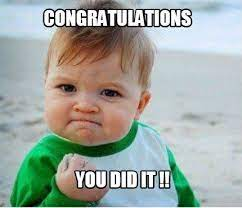

